In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pylab as plt
# %matplotlib inline

# 支持中文
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置画图的中文字体显示
plt.rcParams['axes.unicode_minus'] = False   #显示负号
plt.rcParams['font.size'] = 12

#隐藏红色警示框
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

seed = 123

In [2]:
original_huayan_df = pd.read_excel('huayan_data.xlsx')
original_plc_df = pd.read_excel('plc_data2.xlsx')
test_df = pd.read_excel('test_data.xlsx')
original_plc_df.columns

Index(['时间', '给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水流量设定', '半自磨_给矿水阀位',
       '半自磨_排矿水流量', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流',
       '一段渣浆泵1_频率反馈', '一段渣浆泵1_频率设定', '一段渣浆泵1_矿浆流量反馈', '一段渣浆泵1_矿浆流量设定',
       '一段渣浆泵2_电流', '一段渣浆泵2_频率反馈', '一段渣浆泵2_频率设定', '一段渣浆泵2_立管补水流量',
       '一段渣浆泵2_矿浆流量反馈', '一段渣浆泵2_矿浆流量设定', '一段旋流器1_压力', '一段旋流器2_压力', '球磨机_功率1',
       '球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位'],
      dtype='object')

In [3]:
#去除plc表中所有设定值列、一段渣浆泵2相关列以及一段旋流器2相关列

original_plc_copy = original_plc_df.copy()

main_cols1 = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2', '半自磨_进料端总高压', '半自磨_出料端总高压', 
             '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈']
main_cols2 = ['一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', 
             '球磨机_排矿水流量', '球磨机_排矿水阀位']
main_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2', '半自磨_进料端总高压', '半自磨_出料端总高压', 
             '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', 
             '一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', 
             '球磨机_排矿水流量', '球磨机_排矿水阀位']

original_plc_copy1 = original_plc_copy[main_cols1]
original_plc_copy2 = original_plc_copy[main_cols2]
original_plc_copy = original_plc_copy[main_cols]

In [4]:
#由于此处缺失值所占份额相较总量级较少，因此选择直接删除任何含有缺失值的行


original_plc_copy.isnull().sum()

给料皮带G1_矿量反馈       106
返料皮带F3_电流          23
返料皮带F3_矿量          83
半自磨_功率1             3
半自磨_功率2             3
半自磨_进料端总高压          3
半自磨_出料端总高压          3
半自磨_给矿水流量反馈         3
半自磨_给矿水阀位           3
半自磨_排矿水流量           3
直线筛_冲筛水流量           3
一段泵池_液位             3
一段泵池_补加水流量反馈        3
一段渣浆泵1_电流        2328
一段渣浆泵1_矿浆流量反馈    2657
一段旋流器1_压力        2658
球磨机_功率1             2
球磨机_功率2             2
球磨机_进料端总高压          2
球磨机_出料端总高压          2
球磨机_排矿水流量           3
球磨机_排矿水阀位           3
dtype: int64

In [5]:
original_plc_copy.dropna(axis=0,how='any',inplace=True)
original_plc_copy.reset_index(inplace=True,drop=True)
original_plc_copy.isnull().sum()

给料皮带G1_矿量反馈      0
返料皮带F3_电流        0
返料皮带F3_矿量        0
半自磨_功率1          0
半自磨_功率2          0
半自磨_进料端总高压       0
半自磨_出料端总高压       0
半自磨_给矿水流量反馈      0
半自磨_给矿水阀位        0
半自磨_排矿水流量        0
直线筛_冲筛水流量        0
一段泵池_液位          0
一段泵池_补加水流量反馈     0
一段渣浆泵1_电流        0
一段渣浆泵1_矿浆流量反馈    0
一段旋流器1_压力        0
球磨机_功率1          0
球磨机_功率2          0
球磨机_进料端总高压       0
球磨机_出料端总高压       0
球磨机_排矿水流量        0
球磨机_排矿水阀位        0
dtype: int64

In [6]:
original_plc_copy.describe()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段泵池_补加水流量反馈,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位
count,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,...,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000,242250.000000
mean,956.557302,26.788907,108.462849,3428.540248,3428.491191,734.719232,873.048644,223.551578,15.696930,246.451776,...,3488.202545,53.068875,2987.039162,0.070306,4589.906130,4589.889218,63.717263,57.730361,8.763281,99.624308
std,43.460585,0.705967,34.670997,237.213451,231.481379,11.852544,12.127739,19.419259,3.315325,118.765064,...,161.985000,1.943255,110.496875,0.004202,82.256235,83.175660,0.450330,0.492165,0.835200,0.303534
min,2.484086,25.146000,0.188657,2685.000000,2750.000000,697.000000,826.000000,86.805557,0.144676,2.170139,...,1607.638672,15.740740,4.861111,0.003819,4297.000000,4297.000000,63.000000,57.000000,7.233796,98.929398
25%,939.481201,26.070000,85.084488,3265.000000,3267.000000,726.000000,865.000000,213.194427,14.351852,180.989563,...,3395.833008,51.993629,2951.909668,0.067882,4535.000000,4535.000000,63.000000,57.000000,7.957175,99.392349
50%,958.360229,26.664001,107.534714,3415.000000,3412.000000,735.000000,875.000000,220.370361,15.306713,259.982605,...,3501.157227,53.149597,2989.583496,0.070660,4580.000000,4582.000000,64.000000,58.000000,8.680555,99.652771
75%,976.742432,27.521999,133.192108,3570.000000,3560.000000,744.000000,882.000000,229.398163,16.203701,319.878479,...,3599.537109,54.280960,3028.472168,0.073003,4640.000000,4642.000000,64.000000,58.000000,8.680555,99.942123
max,1717.000000,28.115997,229.407410,4492.000000,4400.000000,769.000000,907.000000,379.629639,51.793976,727.864502,...,3974.537109,59.986977,3194.965332,0.082899,4990.000000,5035.000000,64.000000,59.000000,10.850695,100.000000


In [7]:
original_plc_copy1.describe()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,直线筛_冲筛水流量,一段泵池_液位,一段泵池_补加水流量反馈
count,245008.000000,245091.000000,245031.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000,245111.000000
mean,955.404114,26.791398,107.930267,3423.256133,3423.209513,734.697880,873.176369,223.131455,15.655746,246.212439,60.193771,69.327586,3470.257760
std,44.652371,0.703451,34.883858,241.222925,235.589039,11.793773,12.148882,20.150423,3.416754,118.160843,12.918302,1.959365,235.591769
min,2.484086,25.146000,0.188657,2677.000000,2737.000000,697.000000,826.000000,86.805557,0.144676,2.170139,49.479164,56.336807,1530.092529
25%,938.984375,26.070000,84.329849,3260.000000,3262.000000,726.000000,865.000000,212.962952,14.236111,182.291656,52.083328,69.039352,3391.203613
50%,958.360229,26.664001,106.968750,3412.000000,3410.000000,735.000000,875.000000,220.370361,15.306713,259.114563,53.530090,69.733795,3500.000000
75%,976.245605,27.521999,132.814819,3565.000000,3557.000000,743.000000,883.000000,229.166656,16.203701,319.444458,56.423607,70.428238,3598.379395
max,1717.000000,28.115997,229.407410,4492.000000,4400.000000,769.000000,907.000000,379.629639,51.793976,727.864502,100.549759,82.146988,3974.537109


In [8]:
original_plc_copy2.describe()

,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位
count,242786.000000,242457.000000,242456.000000,245112.000000,245112.000000,245112.000000,245112.000000,245111.000000,245111.000000
mean,52.996636,2987.059895,0.070307,4592.059826,4592.038933,63.719899,57.743758,8.756472,99.620331
std,2.752668,110.471217,0.004202,84.694113,85.573936,0.449049,0.506961,0.835789,0.304130
min,0.024595,4.861111,0.003819,4297.000000,4297.000000,63.000000,57.000000,7.233796,98.929398
25%,51.993629,2951.909668,0.067882,4535.000000,4535.000000,63.000000,57.000000,7.957175,99.392349
50%,53.149597,2989.583496,0.070660,4580.000000,4582.000000,64.000000,58.000000,8.680555,99.652771
75%,54.256363,3028.472168,0.073003,4642.000000,4645.000000,64.000000,58.000000,8.680555,99.942123
max,59.986977,3194.965332,0.082899,4990.000000,5035.000000,64.000000,59.000000,10.850695,100.000000


<br/>
<br/>
此处可以看出，除去 *'返料皮带F3_电流', '半自磨_进料端总高压', '半自磨_出料端总高压', '球磨机_进料端总高压', '球磨机_出料端总高压', 
'球磨机_排矿水流量', '球磨机_排矿水阀位',* 之外，剩余的列均存在数值差异大的情况，所以希望观察一下它们的密度分布

[Text(0.5, 0, '球磨机_功率2'), Text(0.5, 1.0, '球磨机_功率2')]

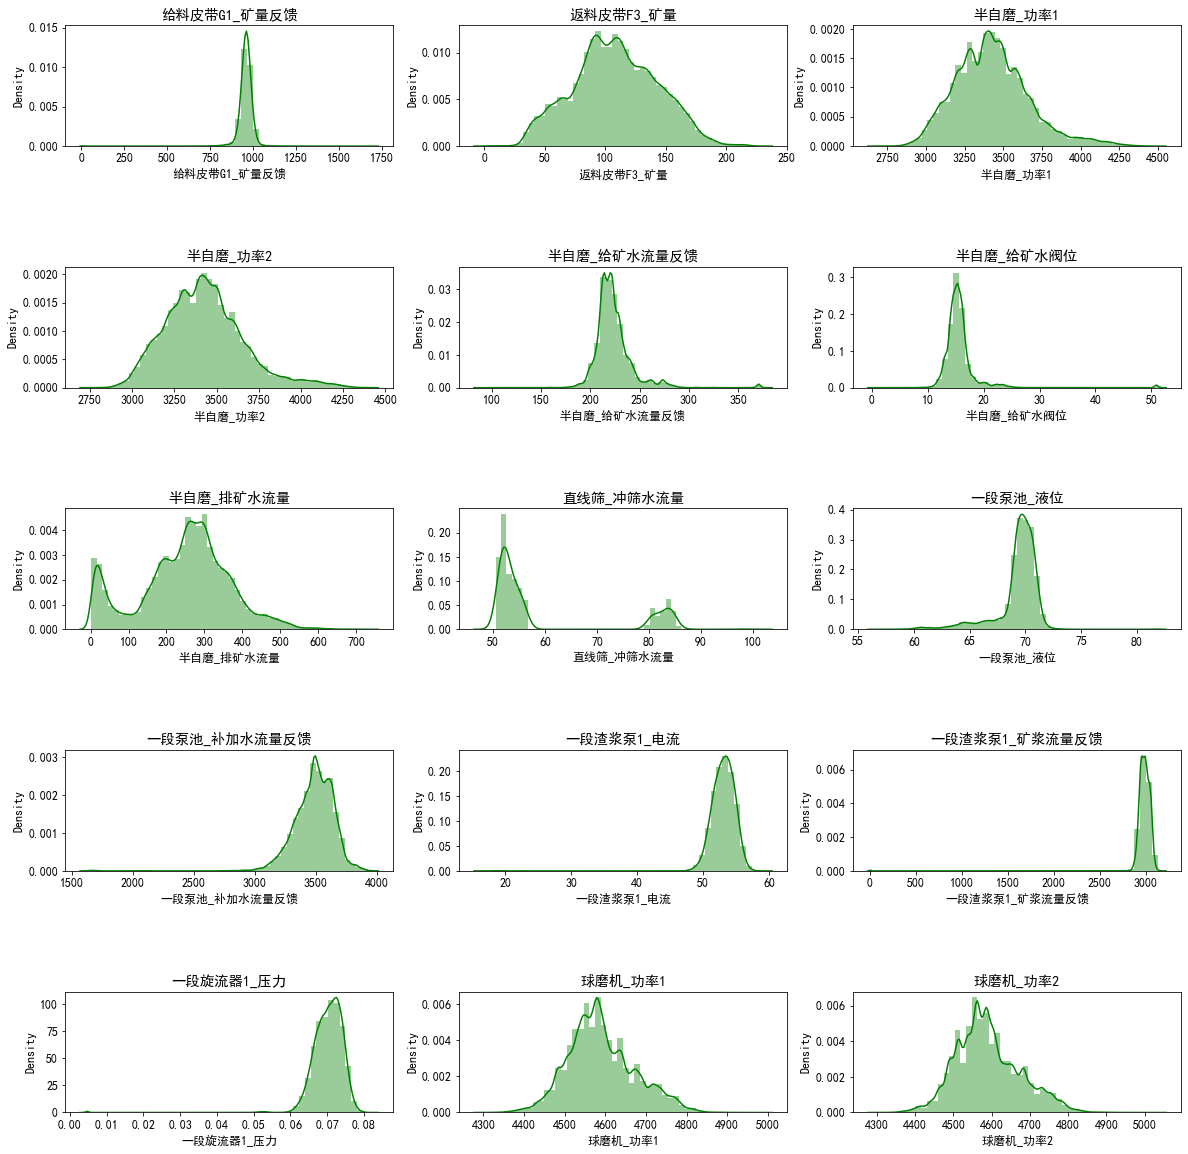

In [9]:
fig, axes = plt.subplots(5,3)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
fig.set_size_inches(20,20)

sns.distplot(original_plc_copy['给料皮带G1_矿量反馈'],ax=axes[0,0],color='green')
sns.distplot(original_plc_copy['返料皮带F3_矿量'],ax=axes[0,1],color='green')
sns.distplot(original_plc_copy['半自磨_功率1'],ax=axes[0,2],color='green')
sns.distplot(original_plc_copy['半自磨_功率2'],ax=axes[1,0],color='green')
sns.distplot(original_plc_copy['半自磨_给矿水流量反馈'],ax=axes[1,1],color='green')
sns.distplot(original_plc_copy['半自磨_给矿水阀位'],ax=axes[1,2],color='green')
sns.distplot(original_plc_copy['半自磨_排矿水流量'],ax=axes[2,0],color='green')
sns.distplot(original_plc_copy['直线筛_冲筛水流量'],ax=axes[2,1],color='green')
sns.distplot(original_plc_copy['一段泵池_液位'],ax=axes[2,2],color='green')
sns.distplot(original_plc_copy['一段泵池_补加水流量反馈'],ax=axes[3,0],color='green')
sns.distplot(original_plc_copy['一段渣浆泵1_电流'],ax=axes[3,1],color='green')
sns.distplot(original_plc_copy['一段渣浆泵1_矿浆流量反馈'],ax=axes[3,2],color='green')
sns.distplot(original_plc_copy['一段旋流器1_压力'],ax=axes[4,0],color='green')
sns.distplot(original_plc_copy['球磨机_功率1'],ax=axes[4,1],color='green')
sns.distplot(original_plc_copy['球磨机_功率2'],ax=axes[4,2],color='green')


axes[0,0].set(xlabel='给料皮带G1_矿量反馈',title='给料皮带G1_矿量反馈',)
axes[0,1].set(xlabel='返料皮带F3_矿量',title='返料皮带F3_矿量')
axes[0,2].set(xlabel='半自磨_功率1',title='半自磨_功率1')
axes[1,0].set(xlabel='半自磨_功率2',title='半自磨_功率2')
axes[1,1].set(xlabel='半自磨_给矿水流量反馈',title='半自磨_给矿水流量反馈',)
axes[1,2].set(xlabel='半自磨_给矿水阀位',title='半自磨_给矿水阀位',)
axes[2,0].set(xlabel='半自磨_排矿水流量',title='半自磨_排矿水流量',)
axes[2,1].set(xlabel='直线筛_冲筛水流量',title='直线筛_冲筛水流量',)
axes[2,2].set(xlabel='一段泵池_液位',title='一段泵池_液位',)
axes[3,0].set(xlabel='一段泵池_补加水流量反馈',title='一段泵池_补加水流量反馈',)
axes[3,1].set(xlabel='一段渣浆泵1_电流',title='一段渣浆泵1_电流',)
axes[3,2].set(xlabel='一段渣浆泵1_矿浆流量反馈',title='一段渣浆泵1_矿浆流量反馈',)
axes[4,0].set(xlabel='一段旋流器1_压力',title='一段旋流器1_压力',)
axes[4,1].set(xlabel='球磨机_功率1',title='球磨机_功率1',)
axes[4,2].set(xlabel='球磨机_功率2',title='球磨机_功率2',)

* 由密度分布图可知，大部分变量均含有两个“尾巴”，因此需结合数据背景，对齐进行修正；
* 半自磨排矿水流量和直线筛冲筛水流量存在明显的凹陷，因此需针对该凹陷范围着重分析

<br/>
<br/>
根据先前的相关性分析工作可知，溢流粒度主要受 G1矿量、球磨机功率、渣浆泵1矿量所影响，因此考虑分别分析其余变量同它们的相关性

给料皮带G1_矿量反馈、 半自磨_功率1、一段渣浆泵1_矿浆流量反馈 关系图




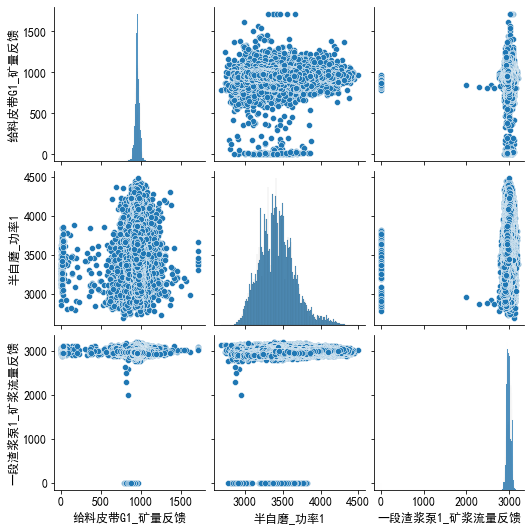

In [10]:
# pairplot

print('给料皮带G1_矿量反馈、 半自磨_功率1、一段渣浆泵1_矿浆流量反馈 关系图')
print('\n')
sns.pairplot(original_plc_copy,x_vars = ['给料皮带G1_矿量反馈', '半自磨_功率1', '一段渣浆泵1_矿浆流量反馈'],
                        y_vars = ['给料皮带G1_矿量反馈', '半自磨_功率1', '一段渣浆泵1_矿浆流量反馈'])

三者分别与其他变量的关系图




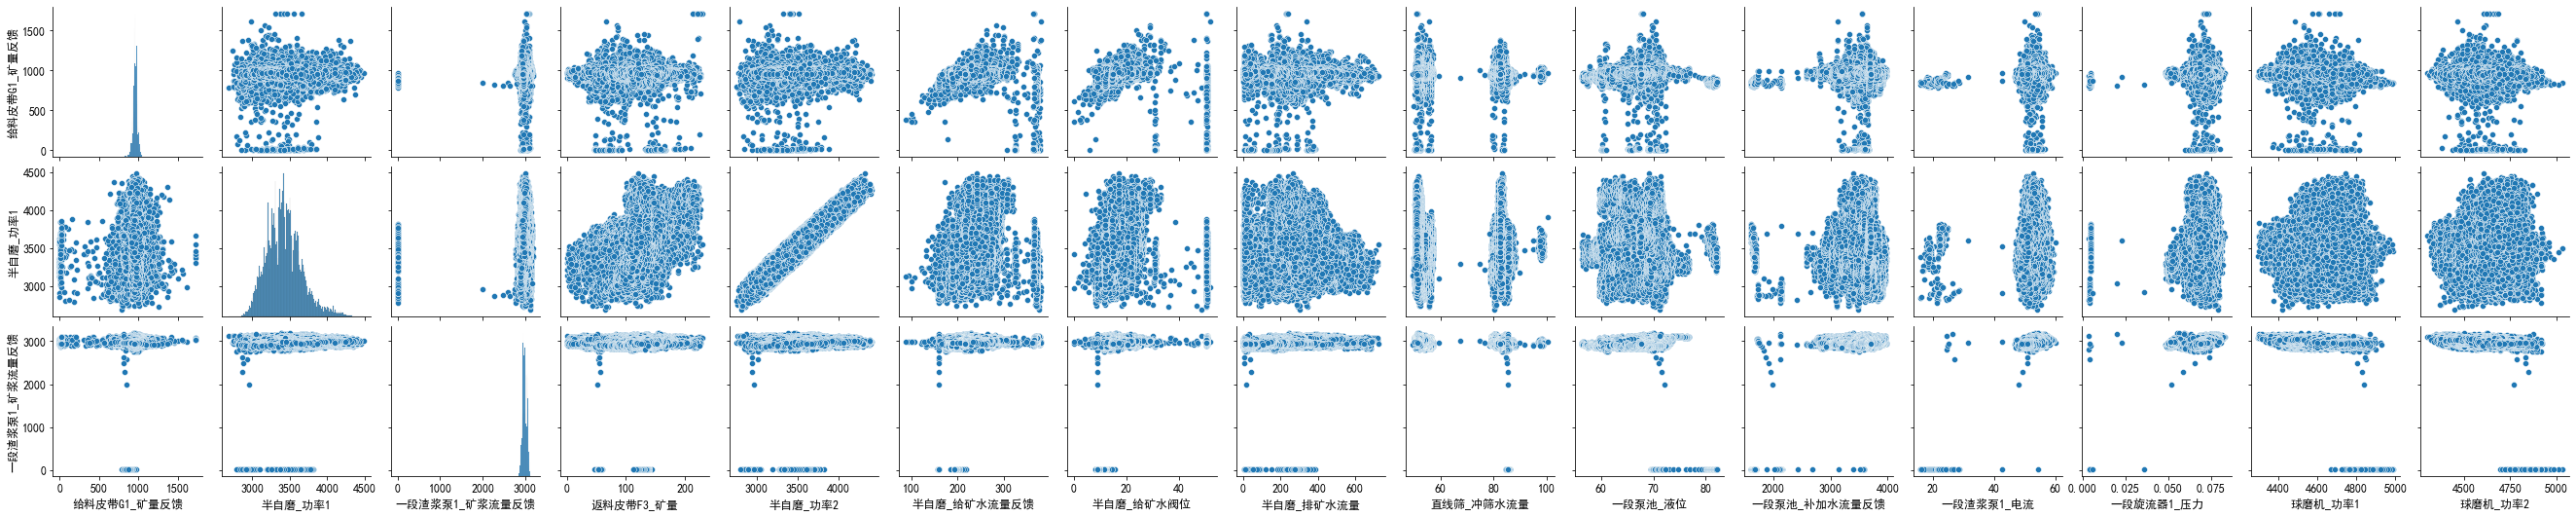

In [11]:
print('三者分别与其他变量的关系图')
print('\n')
sns.pairplot(original_plc_copy,x_vars = ['给料皮带G1_矿量反馈', '半自磨_功率1', '一段渣浆泵1_矿浆流量反馈', '返料皮带F3_矿量', '半自磨_功率2', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量', 
                                         '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流', '一段旋流器1_压力', 
                                         '球磨机_功率1', '球磨机_功率2'],
                                y_vars = ['给料皮带G1_矿量反馈', '半自磨_功率1', '一段渣浆泵1_矿浆流量反馈'])